# 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

# 필요한 데이터 불러오기

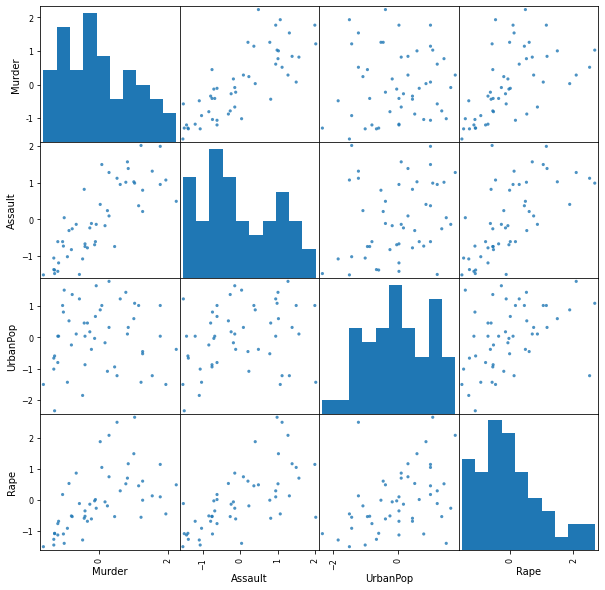

In [ ]:
raw = pd.read_csv('USArrests.csv',index_col=[0])

standard_data = StandardScaler().fit_transform(raw.values)
data = pd.DataFrame(standard_data,columns=raw.columns,index=raw.index)

scatter_matrix(data,marker='o',s=10,alpha=.8,figsize=(10,10))
plt.show()

# 주성분 분석 실시(4개의 성분으로)

In [ ]:
plt.close()

pca = PCA()
column=['pc_1','pc_2','pc_3','pc_4']
coms = pca.fit_transform(standard_data)
pca_df = pd.DataFrame(coms,columns=column,index=raw.index)

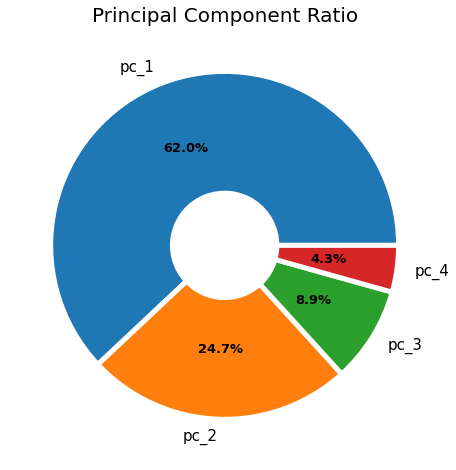

In [ ]:
plt.figure(figsize=(8,8))
ratio = pca.explained_variance_ratio_
_,_,text = plt.pie(ratio,labels=column,autopct='%.1f%%',\
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5},textprops={'fontsize':15})
plt.setp(text, size=13, weight="bold")
plt.title("Principal Component Ratio",fontsize=20)
plt.show()

- pc_1이 가장 많은 기여도를 나타냄
- pc_1과 pc_2의 두개의 성분으로만 데이터의 86.7%정도를 설명할 수 있음
- 두 성분으로 그래프를 그리고 기여하는 벡터들 알아보기

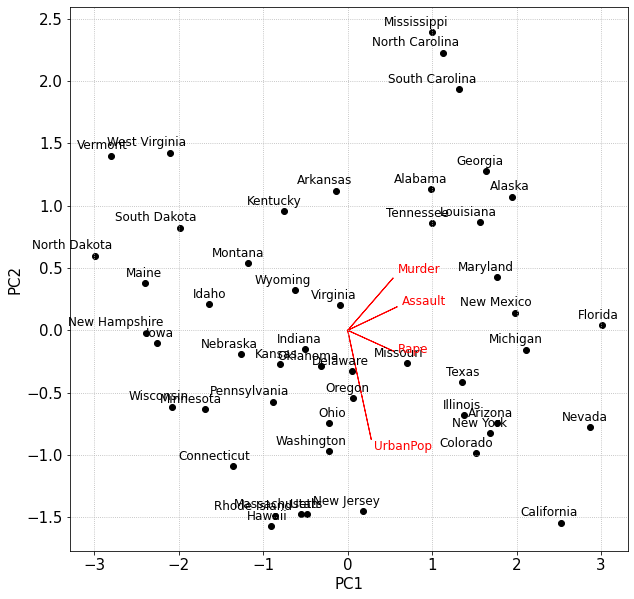

In [ ]:
plt.close()

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(pca_df['pc_1'],pca_df['pc_2'],color='black')
for i, txt in enumerate(data.index):
    ax.annotate(txt, (pca_df['pc_1'][i]+0.2,pca_df['pc_2'][i]+0.05),\
                size=10, xytext=(0,0), ha='right', textcoords='offset points',fontsize=12)
ax.set_xlabel("PC1",fontsize=15);ax.set_ylabel("PC2",fontsize=15)
ax.grid(linestyle=':')

x_vector = pca.components_[0]
y_vector = pca.components_[1]
for j in range(len(x_vector)):
  ax.arrow(0,0,x_vector[j],y_vector[j],color='r')
  ax.text(x_vector[j]*1.1,y_vector[j]*1.1,"{}".format(data.columns[j]),color='red',fontsize=12)
plt.setp([ax.get_xticklabels(),ax.get_yticklabels()],fontsize=15)
plt.show()

- 빨간색 벡터는 마을에 해당하는 범죄율을 나타낸다
- $x$축과 $y$축은 주성분 분석으로 줄어든 차원을 나타내고 있음

In [ ]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [ ]:
pca_df.to_csv('pca_df.csv')